# Importing necessary libraries 

In [154]:
from scipy import stats 
from scipy.stats import ttest_ind
import numpy as np
import pandas as pd
import seaborn as sns

# Loading the data into a dataframe

In [155]:
data = pd.read_csv('responses.csv')

# Extracting The Relevant Columns and Exploring the data

In [156]:
df=data[['Finances','Gender','Village - town','Healthy eating']]
print(df.head())
print(df.tail())

   Finances  Gender Village - town  Healthy eating
0       3.0  female        village             4.0
1       3.0  female           city             3.0
2       2.0  female           city             3.0
3       2.0  female           city             3.0
4       4.0  female        village             4.0
      Finances  Gender Village - town  Healthy eating
1005       3.0  female           city             3.0
1006       3.0    male        village             3.0
1007       1.0  female           city             2.0
1008       3.0  female           city             3.0
1009       5.0    male        village             3.0


In [157]:
df.isna().sum()

Finances          3
Gender            6
Village - town    4
Healthy eating    3
dtype: int64

In [158]:
df.dtypes

Finances          float64
Gender             object
Village - town     object
Healthy eating    float64
dtype: object

In [159]:
df.groupby(['Gender']).count()
df.groupby(['Village - town']).count()

,Finances,Gender,Healthy eating
Village - town,,,
city,705,704,704
village,298,296,299


# Is saving money (finances) gender dependant?

# we first filter the finances of male and female as two different arrays without any missing values

In [160]:
x = df[df['Gender'] == 'male']
y = df[df['Gender'] == 'female']
g=x['Finances']
print(g.isna().sum())
v=y['Finances']
print(v.isna().sum())

1
2


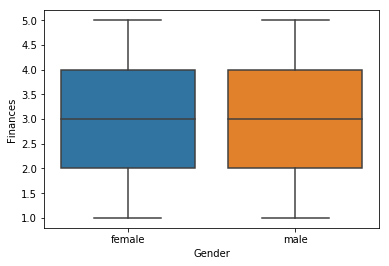

In [161]:
sns.boxplot(x=df['Gender'],y=df['Finances'])

In [141]:
g.fillna(g.median(),inplace=True)
v.fillna(v.median(),inplace=True)

In [142]:
a=g.values
b=v.values

# Performing Ttest will either reject the null hypothesis (Ho) or will fail to reject the null hypothesis (Ha)
    Null Hypothesis (Ho) : Saving money is not gender dependant
    Alternate Hypothesis (Ha): Saving money is gender dependant

In [143]:
t_statistic, p_value  =  stats.ttest_ind(a,b)
print('The p value is ',p_value)
if (p_value<0.05):
    print('Since the p value is less than 5% significance, Hence reject null')
    print('Saving money is gender dependant')
else:
    print('Since the p value is greater than 5% significance, Hence Failed to reject Null')
    print('Saving money is not gender dependant')

The p value is  0.05195393294789817
Since the p value is greater than 5% significance, Hence Failed to reject Null
Saving money is not gender dependant


# Is there any differences in money saving (finances) between people from city or village?

# we first filter the finances of village and city people as two different arrays without any missing values

In [120]:
p = df[df['Village - town'] == 'village']
q = df[df['Village - town'] == 'city']
l=p['Finances']
print(l.isna().sum())
m=q['Finances']
print(m.isna().sum())

1
2


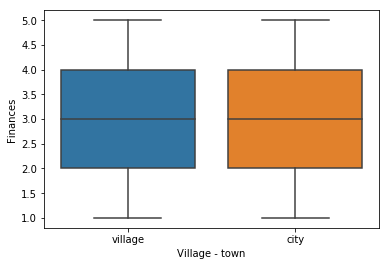

In [121]:
sns.boxplot(x=df['Village - town'],y=df['Finances'])

In [122]:
l.fillna(l.median(),inplace=True)
m.fillna(m.median(),inplace=True)

In [123]:
z= l.values
k= m.values

# Performing Ttest will either reject the null hypothesis (Ho) or will fail to reject the null hypothesis (Ha)
    Null Hypothesis (Ho) : No significant difference between money savings of city and village people
    Alternate Hypothesis (Ha): There is significant difference between money savings of city and village people

In [144]:
t_statistic, p_value  =  stats.ttest_ind(z,k)
print('The p value is ',p_value)
if (p_value<0.05):
    print('Since the p value is less than 5% significance, Hence reject null')
    print('There is significant difference between money savings of city and village people')
else:
    print('Since the p value is greater than 5% significance, Hence Failed to reject Null')
    print('No significant difference between money savings of city and village people')

The p value is  0.007282559470137819
Since the p value is less than 5% significance, Hence reject null
There is significant difference between money savings of city and village people


# Do Women have a Healthier Lifestyle than Men?

# we first filter the Healthy eating values of Men and Women as two different arrays without any missing values

In [145]:
n = df[df['Gender'] == 'male']
o = df[df['Gender'] == 'female']
e=n['Healthy eating']
print(e.isna().sum())
f=o['Healthy eating']
print(f.isna().sum())

2
1


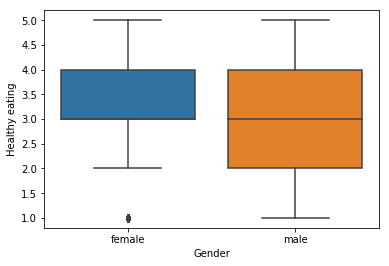

In [146]:
sns.boxplot(x=df['Gender'],y=df['Healthy eating'])

In [147]:
e.fillna(e.median(),inplace=True)
f.fillna(f.median(),inplace=True)

In [148]:
r= e.values
s= f.values

# Performing Ttest will either reject the null hypothesis (Ho) or will fail to reject the null hypothesis (Ha)
    Null Hypothesis (Ho) : Women and men both are equally healthy
    Alternate Hypothesis (Ha): Women have a Healthier Lifestyle than Men

In [149]:
t_statistic, p_value  =  stats.ttest_ind(s,r)
print('The p value is ',p_value)
if (p_value<0.05):
    print('Since the p value is less than 5% significance, Hence reject null')
    print('Women have a Healthier Lifestyle than Men')
else:
    print('Since the p value is greater than 5% significance, Hence Failed to reject Null')
    print('Women and men both are equally healthy')

The p value is  0.04263440495166596
Since the p value is less than 5% significance, Hence reject null
Women have a Healthier Lifestyle than Men


# Are Village People Healthier than City People?

# We first filter the Healthy eating values of city and village people as two different arrays without any missing values

In [150]:
u = df[df['Village - town'] == 'village']
w = df[df['Village - town'] == 'city']
ki=u['Healthy eating']
print(ki.isna().sum())
ka=w['Healthy eating']
print(ka.isna().sum())

0
3


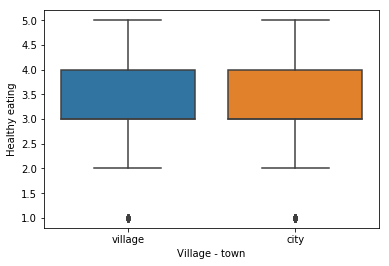

In [151]:
sns.boxplot(x=df['Village - town'],y=df['Healthy eating'])

In [152]:
ki.fillna(ki.median(),inplace=True)
ka.fillna(ka.median(),inplace=True)

In [153]:
kii= ki.values
kaa= ka.values

# Performing Ttest will either reject the null hypothesis (Ho) or will fail to reject the null hypothesis (Ha)
    Null Hypothesis (Ho) : City and Village people both are equally healthy
    Alternate Hypothesis (Ha): Village People are Healthier than City People

In [134]:
t_statistic, p_value  =  stats.ttest_ind(kii,kaa)
print('The p value is ',p_value)
if (p_value<0.05):
    print('Since the p value is less than 5% significance, Hence reject null')
    print('Village People are Healthier than City People2')
else:
    print('Since the p value is greater than 5% significance, Hence Failed to reject Null')
    print('City and Village people both are equally healthy')

The p value is  0.3255175651048364
Since the p value is greater than 5% significance, Hence Failed to reject Null
City and Village people both are equally healthy
